In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.utils import check_array
from keras.models import load_model
from keras.layers import Bidirectional
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from numpy import array
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.layers import Dense,LSTM,Dropout,Activation
import os
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df=pd.read_csv('next_Delta_Iran.csv',usecols=['cases'])

df.head()

cases
0  13792
1  14470
2  11701
3  13271
4  14078

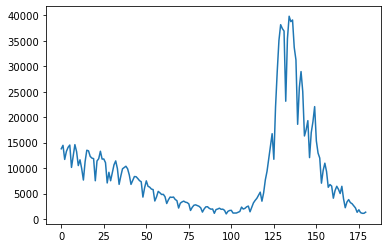

In [3]:
plt.plot(df)

In [4]:
len(df)

180

In [6]:
df1=pd.read_csv('next_Delta_Iran.csv',usecols=['cases'])
window=7
rolling = df1.rolling(window)
df1 = rolling.mean()
for i in range(window-1):
    df1.iloc[i]=df.iloc[i]
df = df1

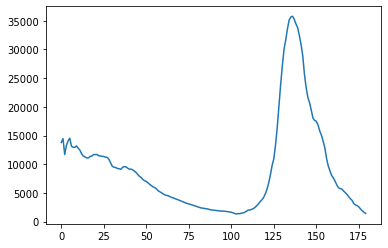

In [7]:
plt.plot(df)

In [8]:
df=df.dropna(how='all')

In [9]:
train_df,test_df =df[1:int(0.60 * len(df))],df[int(0.60 * len(df)):] 

In [10]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

C:\Users\SEPANT~1\AppData\Local\Temp/ipykernel_8388/3151536076.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
C:\Users\SEPANT~1\AppData\Local\Temp/ipykernel_8388/3151536076.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i]=s_s


In [11]:
def split_series(series, n_past, n_future):
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
    # slicing the past and future parts of the window
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)

In [65]:
n_past = 5
n_future = 7
n_features = 1

In [66]:
X_train, y_train = split_series(train.values,n_past, n_future)

In [67]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [68]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = n_future)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_gru = create_gru(64)

In [69]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split=0.2,
                        batch_size = 16, shuffle = False, 
                        )
    return history
history_gru = fit_model(model_gru)


Epoch 1/100
5/5 [==============================] - 7s 291ms/step - loss: 0.2510 - val_loss: 0.6891
Epoch 2/100
5/5 [==============================] - 0s 22ms/step - loss: 0.1744 - val_loss: 0.4629
Epoch 3/100
5/5 [==============================] - 0s 23ms/step - loss: 0.1094 - val_loss: 0.2365
Epoch 4/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0513 - val_loss: 0.0579
Epoch 5/100
5/5 [==============================] - 0s 23ms/step - loss: 0.0227 - val_loss: 0.0237
Epoch 6/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0251 - val_loss: 0.0562
Epoch 7/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0205 - val_loss: 0.0146
Epoch 8/100
5/5 [==============================] - 0s 23ms/step - loss: 0.0152 - val_loss: 0.0036
Epoch 9/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0161 - val_loss: 0.0068
Epoch 10/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0184 - val_loss: 0.0034
Epoch 11/100
5/5 [

In [19]:
model_gru.save('GRU_3days.h5')
#model_gru=load_model("GRU_3days.h5")

In [58]:
#model_gru.save('GRU_5days.h5')
model_gru=load_model("GRU_5days.h5")

In [158]:
#model_gru.save('GRU_7days.h5')
model_gru=load_model("GRU_7days.h5")

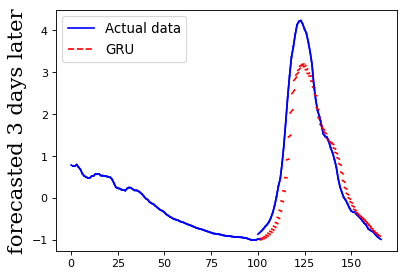

In [28]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred3GRU=model_gru.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred3GRU[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 3 days later", fontdict = font1)
    plt.legend(['Actual data','GRU'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [29]:
#MAE
from sklearn.metrics import mean_absolute_error
pred3GRU = pred3GRU.reshape((pred3GRU.shape[0], pred3GRU.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1],n_features))
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred3GRU[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred3GRU[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors)) 
    

cases
Day  1 :
MAE-E2D2 :  0.3517089065823771
Day  2 :
MAE-E2D2 :  0.42608625240071696
Day  3 :
MAE-E2D2 :  0.5156746771357732


mean 0.4311566120396224


In [30]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred3GRU[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred3GRU[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   



cases
Day  1 :
MAE-E2D2 :  0.49653642053625735
Day  2 :
MAE-E2D2 :  0.6003316713660068
Day  3 :
MAE-E2D2 :  0.7263755118982025


mean 0.6077478679334889


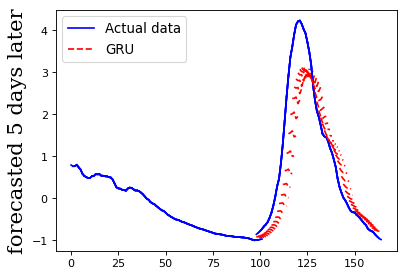

In [59]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred5GRU=model_gru.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred5GRU[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 5 days later", fontdict = font1)
    plt.legend(['Actual data','GRU'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [60]:
#MAE
from sklearn.metrics import mean_absolute_error
pred5GRU = pred5GRU.reshape((pred5GRU.shape[0], pred5GRU.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1],n_features))
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred5GRU[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred5GRU[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors)) 
    

cases
Day  1 :
MAE-E2D2 :  0.4178594318647183
Day  2 :
MAE-E2D2 :  0.5114926538408521
Day  3 :
MAE-E2D2 :  0.6119268571100652
Day  4 :
MAE-E2D2 :  0.7609634693701804
Day  5 :
MAE-E2D2 :  0.8683492186668492


mean 0.634118326170533


In [61]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred5GRU[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred5GRU[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   



cases
Day  1 :
MAE-E2D2 :  0.5936224610630686
Day  2 :
MAE-E2D2 :  0.7252028077684527
Day  3 :
MAE-E2D2 :  0.8546545517003186
Day  4 :
MAE-E2D2 :  1.0515920325969308
Day  5 :
MAE-E2D2 :  1.1859802659793253


mean 0.8822104238216193


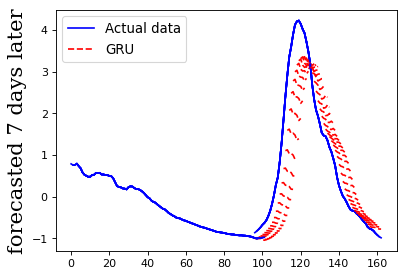

In [70]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred7GRU=model_gru.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred7GRU[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 7 days later", fontdict = font1)
    plt.legend(['Actual data','GRU'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [71]:
#MAE
from sklearn.metrics import mean_absolute_error
pred7GRU = pred7GRU.reshape((pred7GRU.shape[0], pred7GRU.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1],n_features))
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred7GRU[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred7GRU[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors)) 
    

cases
Day  1 :
MAE-E2D2 :  0.4337864784496686
Day  2 :
MAE-E2D2 :  0.5396982383058072
Day  3 :
MAE-E2D2 :  0.6885632570715897
Day  4 :
MAE-E2D2 :  0.8001243114824638
Day  5 :
MAE-E2D2 :  0.9344702518497202
Day  6 :
MAE-E2D2 :  1.0875429343488279
Day  7 :
MAE-E2D2 :  1.1958457844843873


mean 0.811433036570352


In [72]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred7GRU[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred7GRU[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   



cases
Day  1 :
MAE-E2D2 :  0.569122165444303
Day  2 :
MAE-E2D2 :  0.7113190023436192
Day  3 :
MAE-E2D2 :  0.9133400417136541
Day  4 :
MAE-E2D2 :  1.0643519454738761
Day  5 :
MAE-E2D2 :  1.2361594272031802
Day  6 :
MAE-E2D2 :  1.4244707348377665
Day  7 :
MAE-E2D2 :  1.5585251945804621


mean 1.0681840730852659


In [ ]:
###########Alpha deaths

In [76]:
df=pd.read_csv('next_Delta_Iran.csv',usecols=['deaths'])

df.head()

deaths
0     288
1     289
2     239
3     272
4     268

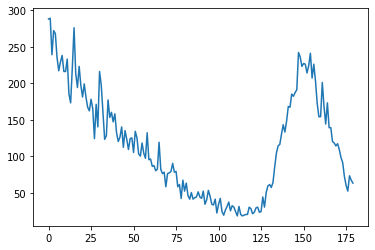

In [78]:
plt.plot(df)

In [80]:
df1=pd.read_csv('next_Delta_Iran.csv',usecols=['deaths'])
window=7
rolling = df1.rolling(window)
df1 = rolling.mean()
for i in range(window-1):
    df1.iloc[i]=df.iloc[i]
df = df1

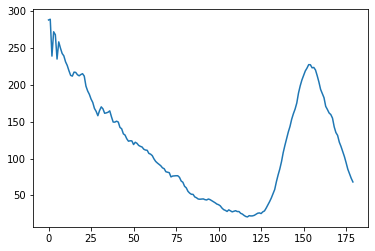

In [81]:
plt.plot(df)

In [93]:
train_df,test_df =df[1:int(0.70 * len(df))],df[int(0.70 * len(df)):] 

In [94]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

C:\Users\SEPANT~1\AppData\Local\Temp/ipykernel_8388/3151536076.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
C:\Users\SEPANT~1\AppData\Local\Temp/ipykernel_8388/3151536076.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i]=s_s


In [129]:
def split_series(series, n_past, n_future):
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
    # slicing the past and future parts of the window
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)

In [167]:
n_past = 5
n_future =7
n_features = 1

In [168]:
X_train, y_train = split_series(train.values,n_past, n_future)

In [169]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [175]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = n_future)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_gru = create_gru(64)

In [176]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        )
    return history
history_gru = fit_model(model_gru)


Epoch 1/100
6/6 [==============================] - 8s 230ms/step - loss: 0.2387 - val_loss: 0.7185
Epoch 2/100
6/6 [==============================] - 0s 20ms/step - loss: 0.1558 - val_loss: 0.4432
Epoch 3/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0851 - val_loss: 0.1828
Epoch 4/100
6/6 [==============================] - 0s 23ms/step - loss: 0.0351 - val_loss: 0.0443
Epoch 5/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0284 - val_loss: 0.0273
Epoch 6/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0130 - val_loss: 8.1933e-04
Epoch 7/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0136 - val_loss: 0.0090
Epoch 8/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0115 - val_loss: 0.0052
Epoch 9/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0117 - val_loss: 0.0025
Epoch 10/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0102 - val_loss: 0.0010
Epoch 11/100
6

In [122]:
#model_gru.save('GRU_3daysdeaths.h5')
model_gru=load_model("GRU_3daysdeaths.h5")

In [160]:
#model_gru.save('GRU_5daysdeaths.h5')
model_gru=load_model("GRU_5daysdeaths.h5")

In [179]:
#model_gru.save('GRU_7daysdeaths.h5')
model_gru=load_model("GRU_7daysdeaths.h5")

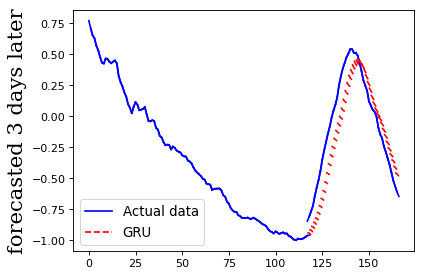

In [123]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred3GRU=model_gru.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred3GRU[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 3 days later", fontdict = font1)
    plt.legend(['Actual data','GRU'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [124]:
#MAE
from sklearn.metrics import mean_absolute_error
pred3GRU = pred3GRU.reshape((pred3GRU.shape[0], pred3GRU.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1],n_features))
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred3GRU[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred3GRU[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors)) 
    

deaths
Day  1 :
MAE-E2D2 :  0.1397582965126799
Day  2 :
MAE-E2D2 :  0.18842563650267438
Day  3 :
MAE-E2D2 :  0.23537654626215707


mean 0.1878534930925038


In [125]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred3GRU[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred3GRU[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   



deaths
Day  1 :
MAE-E2D2 :  0.15694990137537757
Day  2 :
MAE-E2D2 :  0.21121186900773692
Day  3 :
MAE-E2D2 :  0.26365747599154027


mean 0.21060641545821826


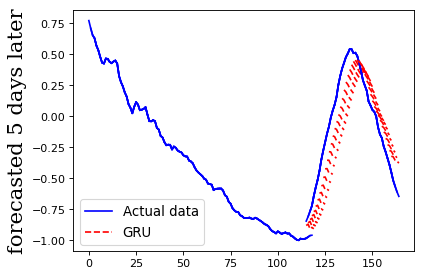

In [161]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred5GRU=model_gru.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred5GRU[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 5 days later", fontdict = font1)
    plt.legend(['Actual data','GRU'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [162]:
#MAE
from sklearn.metrics import mean_absolute_error
pred5GRU = pred5GRU.reshape((pred5GRU.shape[0], pred5GRU.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1],n_features))
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred5GRU[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred5GRU[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors)) 
    

deaths
Day  1 :
MAE-E2D2 :  0.13172565628302121
Day  2 :
MAE-E2D2 :  0.1775436955502285
Day  3 :
MAE-E2D2 :  0.2350312310464107
Day  4 :
MAE-E2D2 :  0.2768086917736006
Day  5 :
MAE-E2D2 :  0.32141773831072085


mean 0.2285054025927964


In [163]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred5GRU[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred5GRU[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   



deaths
Day  1 :
MAE-E2D2 :  0.14719667228705702
Day  2 :
MAE-E2D2 :  0.19676738677515362
Day  3 :
MAE-E2D2 :  0.2609371276789045
Day  4 :
MAE-E2D2 :  0.3072491093309104
Day  5 :
MAE-E2D2 :  0.35738386882175877


mean 0.2539068329787569


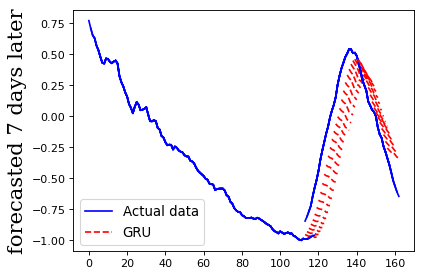

In [180]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred7GRU=model_gru.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred7GRU[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 7 days later", fontdict = font1)
    plt.legend(['Actual data','GRU'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [181]:
#MAE
from sklearn.metrics import mean_absolute_error
pred7GRU = pred7GRU.reshape((pred7GRU.shape[0], pred7GRU.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1],n_features))
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred7GRU[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred7GRU[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors)) 
    

deaths
Day  1 :
MAE-E2D2 :  0.1489165233217854
Day  2 :
MAE-E2D2 :  0.19863388270818821
Day  3 :
MAE-E2D2 :  0.24419922282625278
Day  4 :
MAE-E2D2 :  0.29545333472870305
Day  5 :
MAE-E2D2 :  0.3416047028402161
Day  6 :
MAE-E2D2 :  0.38546214373608156
Day  7 :
MAE-E2D2 :  0.42334243299081126


mean 0.291087463307434


In [182]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred7GRU[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred7GRU[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   



deaths
Day  1 :
MAE-E2D2 :  0.1685267945464754
Day  2 :
MAE-E2D2 :  0.22482786102850066
Day  3 :
MAE-E2D2 :  0.2754360253835999
Day  4 :
MAE-E2D2 :  0.3311851745895743
Day  5 :
MAE-E2D2 :  0.38543144017418535
Day  6 :
MAE-E2D2 :  0.4353665482140014
Day  7 :
MAE-E2D2 :  0.47835105694854224


mean 0.3284464144121256
